# Построение и обучение MLP (продолжение)


## __Содержание__

1. Введение

2. Задание гиперпараметров
    - Количество слоёв и нейронов
    - Активационные функции
    - Инициализация весов

3. Определение функции потерь и оптимизаторов
    - Функции потерь
    - Оптимизаторы

---



## 1. Введение, основные термины

Гиперпараметры — это параметры модели, которые устанавливаются до начала обучения и не обновляются во время обучения. Они существенно влияют на эффективность и точность модели.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import time
import matplotlib.pyplot as plt

import numpy as np

## 2.1 Влияние количества слоев

### Создание классов моделей

Для сравнительного анализа можно предложить три варианта многослойных перцептронов (MLP) с разным числом параметров. Это позволит увидеть, как изменение архитектуры сети влияет на точность и скорость обучения.

1. __Сеть 1 (Малая)__: 
   - Входной слой: 784 нейрона
   - Один скрытый слой: 16 нейрона
   - Выходной слой: 10 нейронов
   - __Характеристика:__ минимальное число параметров, быстрая скорость обучения.


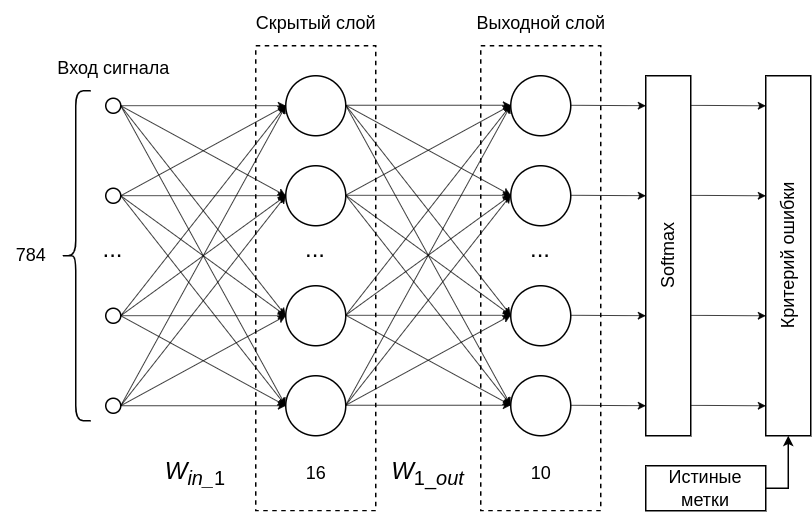

In [3]:
class SmallMLP(nn.Module):
    def __init__(self):
        super(SmallMLP, self).__init__()        # инициализация
        self.fc1 = nn.Linear(784, 16)           # полносвязный слой 784 -> 16
        self.fc2 = nn.Linear(16, 10)            # полносвязный слой 16 -> 10
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))             # применение fc1 слоя и применение функции активации ReLU  
        x = self.fc2(x)                         # применение fc2 слоя 
        return x


2. __Сеть 2 (Средняя)__: 
   - Входной слой: 784 нейрона
   - Два скрытых слоя: 128 нейронов и 64 нейрона
   - Выходной слой: 10 нейронов
   - __Характеристика:__ умеренное число параметров, баланс между точностью и скоростью.


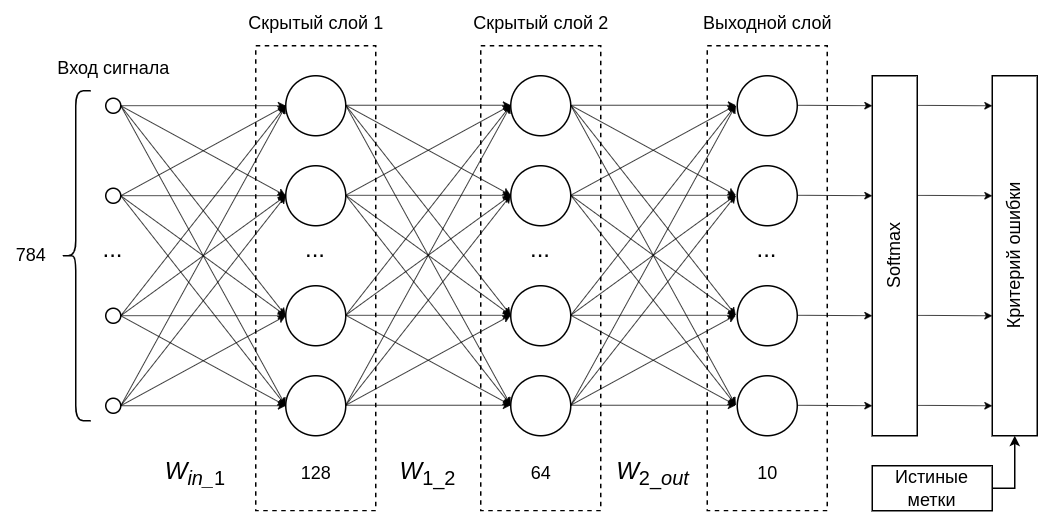

In [4]:

class MediumMLP(nn.Module):
    def __init__(self):
        super(MediumMLP, self).__init__()       # инициализация 
        self.fc1 = nn.Linear(784, 128)          # полносвязный слой 784 -> 128
        self.fc2 = nn.Linear(128, 64)           # полносвязный слой 128 -> 64
        self.fc3 = nn.Linear(64, 10)            # полносвязный слой 64 -> 10
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))             # применение fc1 слоя и применение функции активации ReLU 
        x = torch.relu(self.fc2(x))             # применение fc2 слоя и применение функции активации ReLU 
        x = self.fc3(x)                         # применение fc3 слоя 
        return x


3. __Сеть 3 (Большая)__:
   - Входной слой: 784 нейрона
   - Три скрытых слоя: 512, 256, 128 и 64 нейрона
   - Выходной слой: 10 нейронов
   - __Характеристика:__ большое число параметров, более медленное обучение, но более высокая точность.


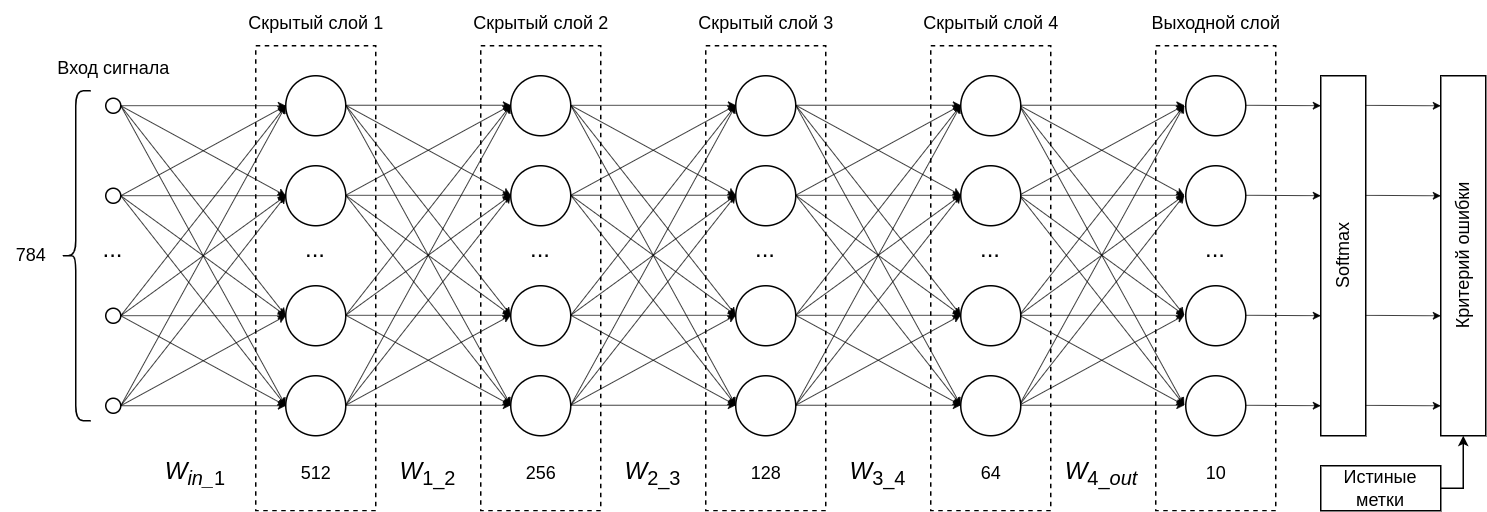

In [5]:
class LargeMLP(nn.Module):
    def __init__(self):
        super(LargeMLP, self).__init__()        # заполнить самостоятельно 
        self.fc1 = nn.Linear(784, 512)          # 
        self.fc2 = nn.Linear(512, 256)          #
        self.fc3 = nn.Linear(256, 128)          #
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 10)            #
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))             #
        x = torch.relu(self.fc2(x))             #
        x = torch.relu(self.fc3(x))             #
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)                         #
        return x


__Реализация и сравнение__:

Мы будем тренировать эти сети на датасете MNIST и сравнивать их по времени обучения и точности на тестовых данных. 

Ниже приведен код для создания моделей и их сравнения.

In [6]:

# Определение MLP моделей (Многослойные перцептроны)
class SmallMLP(nn.Module):
    def __init__(self):
        super(SmallMLP, self).__init__()        # инициализация
        self.fc1 = nn.Linear(784, 16)           # полносвязный слой 784 -> 16
        self.fc2 = nn.Linear(16, 10)            # полносвязный слой 16 -> 10
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))             # применение fc1 слоя и применение функции активации ReLU  
        x = self.fc2(x)                         # применение fc2 слоя 
        return x

class MediumMLP(nn.Module):
    def __init__(self):
        super(MediumMLP, self).__init__()       # инициализация 
        self.fc1 = nn.Linear(784, 128)          # полносвязный слой 784 -> 128
        self.fc2 = nn.Linear(128, 64)           # полносвязный слой 128 -> 64
        self.fc3 = nn.Linear(64, 10)            # полносвязный слой 64 -> 10
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))             # применение fc1 слоя и применение функции активации ReLU 
        x = torch.relu(self.fc2(x))             # применение fc2 слоя и применение функции активации ReLU 
        x = self.fc3(x)                         # применение fc3 слоя 
        return x
    
class LargeMLP(nn.Module):
    def __init__(self):
        super(LargeMLP, self).__init__()        # заполнить самостоятельно 
        self.fc1 = nn.Linear(784, 512)          # 
        self.fc2 = nn.Linear(512, 256)          #
        self.fc3 = nn.Linear(256, 128)          #
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 10)           #
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))             #
        x = torch.relu(self.fc2(x))             #
        x = torch.relu(self.fc3(x))             #
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)                         #
        return x

### Подготовка данных и функция обучения

In [2]:
# Трансформации данных
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Загрузка данных MNIST
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Закомментировать, если работать со всем датасетом 
train_dataset, _ = torch.utils.data.random_split(train_dataset, [10000, 50000])
test_dataset, _ = torch.utils.data.random_split(test_dataset, [2000, 8000])


print(f'Число экземпляров в датасетах: обучающие - {len(train_dataset)}, тестовые - {len(test_dataset)} ')
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

Число экземпляров в датасетах: обучающие - 10000, тестовые - 2000 


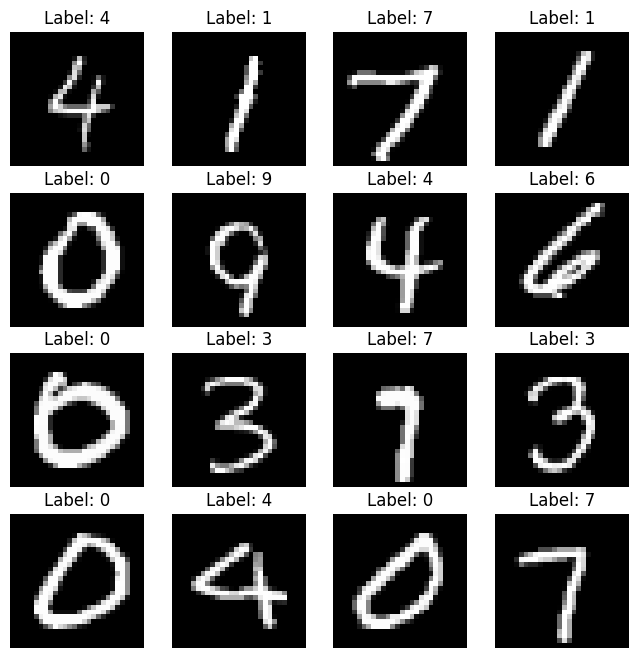

In [3]:
# Получение одного батча изображений и меток
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Функция для преобразования тензора в изображение
def one_imshow(img):
    img = img / 2 + 0.5  # Денормализация изображения
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)), cmap='gray')  # Транспонирование для правильного вывода
    plt.axis('off')

# Вывод батча изображений
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    one_imshow(images[i])
    plt.title(f"Label: {labels[i].item()}")
    plt.axis('off')  # Скрытие осей
plt.show()

### Функция обучения модели

In [4]:
# Проверка доступности CUDA
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = 'cpu'
print(f'Используемое устройство: {device}')

Используемое устройство: cuda


#### Проход данных по модели, пошагово

In [ ]:
# Создание объекта - модели
model = MediumMLP()

model.to(device)

optimizer = optim.Adam(model.parameters(), lr=0.005)
criterion = nn.CrossEntropyLoss(reduction='mean')

In [12]:
# Режим обучения модели
model.train()

# Получение одного батча изображений и меток
data_iter = iter(train_loader)
images, labels = next(data_iter)

In [13]:
print(f'Батч изображений, форма тензора: {images.shape}')
print(f'Батч меток изображений: {labels}')

Батч изображений, форма тензора: torch.Size([64, 1, 28, 28])
Батч меток изображений: tensor([0, 9, 5, 5, 0, 0, 2, 5, 3, 3, 4, 7, 2, 5, 4, 2, 9, 5, 9, 3, 0, 7, 3, 4,
        2, 4, 9, 4, 7, 2, 1, 7, 1, 4, 4, 7, 0, 4, 4, 3, 8, 6, 7, 2, 1, 9, 9, 7,
        3, 4, 3, 3, 8, 6, 0, 1, 1, 1, 2, 9, 0, 7, 4, 4])


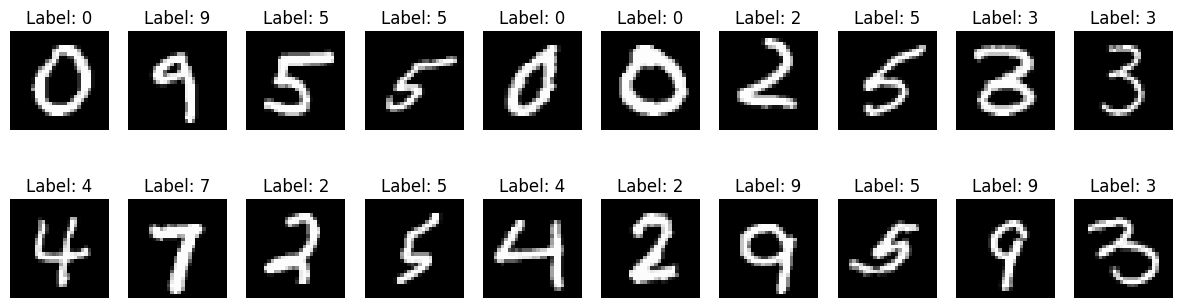

In [14]:
# Функция для преобразования тензора в изображение
def one_imshow(img):
    img = img / 2 + 0.5  # Денормализация изображения
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)), cmap='gray')  # Транспонирование для правильного вывода
    plt.axis('off')

# Вывод батча изображений
plt.figure(figsize=(15, 4))
for i in range(20):
    plt.subplot(2, 10, i+1)
    one_imshow(images[i])
    plt.title(f"Label: {labels[i].item()}")
    plt.axis('off')  # Скрытие осей
plt.show()

In [15]:
# Перенос на нужное устройство  
images = images.to(device)
labels = labels.to(device)
            #   reshape(-1, 28*28)
images = images.view(-1, 28*28)     # Разворачиваем изображения
print(f'Батч изображений, форма тензора после разворачивания: {images.shape}')

Батч изображений, форма тензора после разворачивания: torch.Size([64, 784])


In [17]:
outputs = model(images)             # Проход изображение 
print(f'Батч выходов модели, форма тензора: {outputs.shape}')
print(f'Пример одного выхода: {outputs[0]}')

Батч выходов модели, форма тензора: torch.Size([64, 10])
Пример одного выхода: tensor([ 0.1343,  0.1202,  0.2425,  0.1565,  0.0234, -0.3184, -0.0217, -0.1327,
        -0.0996, -0.1795], device='cuda:0', grad_fn=<SelectBackward0>)


In [18]:
    # CrossEntropyLoss(logit, label) = NLLLoss(Softmax(logits), label)
    #   sofmax(logit)     [0.1, 0.05, 0.05, 0, 0.75, ... ], len = 10
    #   label = 5 
    #   one_hot_encoded = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] 

loss = criterion(outputs, labels)
print(loss)

tensor(2.3030, device='cuda:0', grad_fn=<NllLossBackward0>)


In [22]:
print(model.fc1.weight.grad)
print(model.fc2.weight.grad)

None
None


In [21]:
optimizer.zero_grad()   # обнуляем градиенты

In [23]:
loss.backward()         # проброс градиентов

In [24]:
print(model.fc1.weight.grad, model.fc1.weight.grad.shape)
print(model.fc2.weight.grad, model.fc2.weight.grad.shape)

tensor([[-8.8413e-04, -8.8413e-04, -8.8413e-04,  ..., -8.8413e-04,
         -8.8413e-04, -8.8413e-04],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 4.0705e-03,  4.0705e-03,  4.0705e-03,  ...,  4.0705e-03,
          4.0705e-03,  4.0705e-03],
        ...,
        [-1.3495e-03, -1.3495e-03, -1.3495e-03,  ..., -1.3495e-03,
         -1.3495e-03, -1.3495e-03],
        [-4.8355e-05, -4.8355e-05, -4.8355e-05,  ..., -4.8355e-05,
         -4.8355e-05, -4.8355e-05],
        [-1.3275e-04, -1.3275e-04, -1.3275e-04,  ..., -1.3275e-04,
         -1.3275e-04, -1.3275e-04]], device='cuda:0') torch.Size([128, 784])
tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 8.9984e-03,  0.0000e+00,  1.2741e-02,  ...,  5.0274e-03,
          0.0000e+00,  2.7629e-02],
        [-3.7127e-03,  0.0000e+00, -3.0164e-03,  ..., -2.1039e-03,
         -1.2860e-04, -5.1301e-03],
        ...,
      

In [1]:
optimizer.step()

NameError: name 'optimizer' is not defined

In [27]:
outputs.data.shape

torch.Size([64, 10])

In [29]:
_, predicted = torch.max(outputs.data, 1)
print(f'Предсказанные моделью классы: {predicted[:10]}')
print(f'Истинные классы:              {labels[:10]}')

Предсказанные моделью классы: tensor([2, 2, 2, 3, 2, 2, 2, 3, 3, 2], device='cuda:0')
Истинные классы:              tensor([0, 9, 5, 5, 0, 0, 2, 5, 3, 3], device='cuda:0')


In [31]:
total_train = labels.size(0)
correct_train = (predicted == labels).sum().item()

In [32]:
train_accuracy = 100 * correct_train / total_train
print(f'Точность модели: {train_accuracy}%')

Точность модели: 12.5%


In [33]:
model.eval()

with torch.no_grad():
    
    images = images.to(device)
    labels = labels.to(device)
        
    images = images.view(-1, 28*28)
    outputs = model(images)
    
    _, predicted = torch.max(outputs.data, 1)
    total_test = labels.size(0)
    correct_test = (predicted == labels).sum().item()

test_accuracy = 100 * correct_test / total_test

print(f'Точность модели: {test_accuracy}%')

Точность модели: 17.1875%


#### Функция для обучения моделей разной архитектуры

In [41]:
# Функция для обучения модели
def train_model(model, train_loader, test_loader, num_epochs=10, lr=0.005, device='cpu'):
    
    model.to(device)
    
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    
    train_accuracies = []
    test_accuracies = []
    times = []

    for epoch in range(num_epochs):
        start_time = time.time()
        
        # Обучение
        model.train()
        correct_train = 0
        total_train = 0
        
        for images, labels in train_loader:
            
            images = images.to(device)
            labels = labels.to(device)
            
            images = images.view(-1, 28*28)  # Разворачиваем изображения
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_accuracy = 100 * correct_train / total_train
        train_accuracies.append(train_accuracy)
        
        elapsed_time = time.time() - start_time
        
        # Оценка на тестовых данных
        model.eval()
        correct_test = 0
        total_test = 0
        with torch.no_grad():
            for images, labels in test_loader:
                
                images = images.to(device)
                labels = labels.to(device)
                 
                images = images.view(-1, 28*28)
                outputs = model(images)
                
                _, predicted = torch.max(outputs.data, 1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()

        test_accuracy = 100 * correct_test / total_test
        test_accuracies.append(test_accuracy)
        
        times.append(elapsed_time)

        print(f'Epoch {epoch+1}/{num_epochs}, Time: {elapsed_time:.2f}s, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')

    return train_accuracies, test_accuracies, times


### Обучение моделей

In [34]:
# Инициализация моделей
small_model = SmallMLP()    #.to(device)
medium_model = MediumMLP()  #.to(device)
large_model = LargeMLP()    #.to(device)

In [36]:
# pip install torchinfo
import torchinfo
torchinfo.summary(small_model, input_size=(1, 784))

Layer (type:depth-idx)                   Output Shape              Param #
SmallMLP                                 [1, 10]                   --
├─Linear: 1-1                            [1, 16]                   12,560
├─Linear: 1-2                            [1, 10]                   170
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
Total mult-adds (M): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.05
Estimated Total Size (MB): 0.05

In [37]:
torchinfo.summary(medium_model, input_size=(1, 784))

Layer (type:depth-idx)                   Output Shape              Param #
MediumMLP                                [1, 10]                   --
├─Linear: 1-1                            [1, 128]                  100,480
├─Linear: 1-2                            [1, 64]                   8,256
├─Linear: 1-3                            [1, 10]                   650
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
Total mult-adds (M): 0.11
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.44
Estimated Total Size (MB): 0.44

In [46]:
torchinfo.summary(large_model, input_size=(1, 784))

Layer (type:depth-idx)                   Output Shape              Param #
LargeMLP                                 [1, 10]                   --
├─Linear: 1-1                            [1, 512]                  401,920
├─Linear: 1-2                            [1, 256]                  131,328
├─Linear: 1-3                            [1, 128]                  32,896
├─Linear: 1-4                            [1, 64]                   8,256
├─Linear: 1-5                            [1, 10]                   650
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
Total mult-adds (M): 0.58
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 2.30
Estimated Total Size (MB): 2.31

In [ ]:
# Тренировка моделей
num_epochs = 100
lr = 0.005

small_train_acc, small_test_acc, small_times = train_model(small_model, train_loader, test_loader, 
                                                           num_epochs=num_epochs, lr=lr, device=device)
medium_train_acc, medium_test_acc, medium_times = train_model(medium_model, train_loader, test_loader, 
                                                              num_epochs=num_epochs, lr=lr, device=device)
large_train_acc, large_test_acc, large_times = train_model(large_model, train_loader, test_loader, 
                                                           num_epochs=num_epochs, lr=lr, device=device)


Epoch 1/100, Time: 1.25s, Train Accuracy: 36.95%, Test Accuracy: 61.85%
Epoch 2/100, Time: 1.20s, Train Accuracy: 61.33%, Test Accuracy: 66.90%
Epoch 3/100, Time: 1.20s, Train Accuracy: 67.96%, Test Accuracy: 69.90%
Epoch 4/100, Time: 1.21s, Train Accuracy: 70.56%, Test Accuracy: 71.75%
Epoch 5/100, Time: 1.27s, Train Accuracy: 72.74%, Test Accuracy: 71.35%
Epoch 6/100, Time: 1.22s, Train Accuracy: 74.10%, Test Accuracy: 73.20%
Epoch 7/100, Time: 1.30s, Train Accuracy: 75.30%, Test Accuracy: 72.55%
Epoch 8/100, Time: 1.24s, Train Accuracy: 75.35%, Test Accuracy: 73.45%
Epoch 9/100, Time: 1.26s, Train Accuracy: 75.54%, Test Accuracy: 75.35%
Epoch 10/100, Time: 1.22s, Train Accuracy: 76.68%, Test Accuracy: 73.55%
Epoch 11/100, Time: 1.24s, Train Accuracy: 76.90%, Test Accuracy: 74.45%
Epoch 12/100, Time: 1.24s, Train Accuracy: 77.82%, Test Accuracy: 72.65%
Epoch 13/100, Time: 1.24s, Train Accuracy: 78.22%, Test Accuracy: 75.80%
Epoch 14/100, Time: 1.27s, Train Accuracy: 78.83%, Test Accu

In [31]:
# Опционально, если не устанавливать torchinfo
print("Слои и их параметры:")
for param_tensor in small_model.state_dict():
    print(param_tensor, "\t", small_model.state_dict()[param_tensor].size())

Слои и их параметры:
fc1.weight 	 torch.Size([16, 784])
fc1.bias 	 torch.Size([16])
fc2.weight 	 torch.Size([10, 16])
fc2.bias 	 torch.Size([10])


In [33]:
print("Время обучения small модели ", np.array(small_times).sum())
print("Время обучения medium модели", np.array(medium_times).sum())
print("Время обучения large модели ", np.array(large_times).sum())

Время обучения small модели  126.19934391975403
Время обучения medium модели 124.40549850463867
Время обучения large модели  127.30921769142151


### Построение графиков

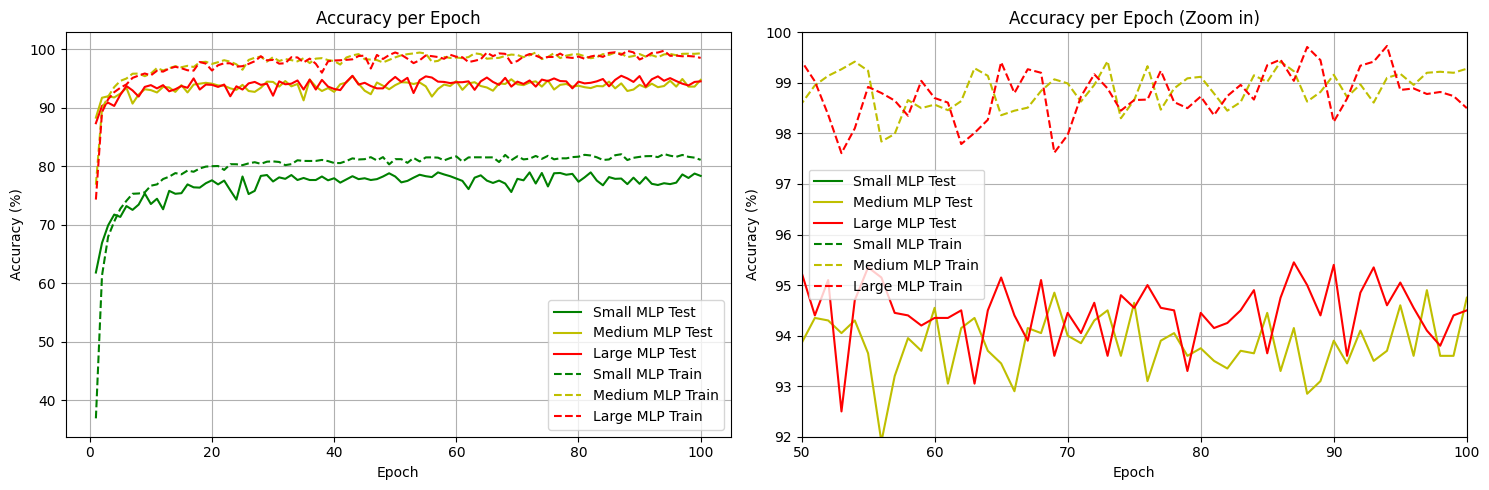

Максимальная точность small модели  78.95
Максимальная точность medium модели 95.4
Максимальная точность large модели  95.45


In [34]:
# Построение графиков
epochs = range(1, num_epochs+1)

# Точность
plt.figure(figsize=(15, 5))


# plot left
plt.subplot(1, 2, 1)
plt.plot(epochs, small_test_acc, 'g', label='Small MLP Test')
plt.plot(epochs, medium_test_acc, 'y', label='Medium MLP Test')
plt.plot(epochs, large_test_acc, 'r', label='Large MLP Test')
plt.plot(epochs, small_train_acc, 'g--', label='Small MLP Train', )     # color='green', linestyle='--'
plt.plot(epochs, medium_train_acc, 'y--', label='Medium MLP Train', )
plt.plot(epochs, large_train_acc, 'r--', label='Large MLP Train', )
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
# plt.ylim([70, 100])

plt.title('Accuracy per Epoch')
plt.legend()
plt.grid(True)


# plot right
plt.subplot(1, 2, 2)
plt.plot(epochs, small_test_acc, 'g', label='Small MLP Test')
plt.plot(epochs, medium_test_acc, 'y', label='Medium MLP Test')
plt.plot(epochs, large_test_acc, 'r', label='Large MLP Test')
plt.plot(epochs, small_train_acc, 'g--', label='Small MLP Train', )
plt.plot(epochs, medium_train_acc, 'y--', label='Medium MLP Train', )
plt.plot(epochs, large_train_acc, 'r--', label='Large MLP Train', )
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.xlim([50, 100])
plt.ylim([92, 100])

plt.title('Accuracy per Epoch (Zoom in)')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

print(f'Максимальная точность small модели  {np.array(small_test_acc).max()}')
print(f'Максимальная точность medium модели {np.array(medium_test_acc).max()}')
print(f'Максимальная точность large модели  {np.array(large_test_acc).max()}')

- Модель с большим числом параметров (Large MLP) обычно достигает более высокой точности, но требует больше времени для обучения.
- Малая модель (Small MLP) обучается быстрее, но достигает меньшей точности.
- Средняя модель (Medium MLP) является компромиссом между точностью и скоростью обучения.

![Screenshot from 2024-10-07 22-38-20.png](<attachment:Screenshot from 2024-10-07 22-38-20.png>)
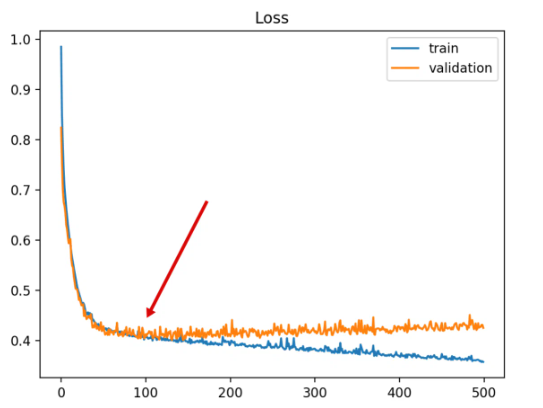

## 2.2. Активационные функции

Для сравнения нескольких моделей с различными функциями активации можно построить несколько MLP и применить к ним разные функции активации, 
- __ReLU__, 
- __Sigmoid__,
- __Tanh__.


1. **ReLU (Rectified Linear Unit)**
Функция активации ReLU задаётся следующим образом:

$$
\text{ReLU}(x) = \max(0, x)
$$

- **Описание:** Если входное значение меньше нуля, выход равен нулю, иначе возвращается само значение. ReLU используется в большинстве современных нейросетей из-за своей простоты и эффективности при обучении глубоких сетей.

2. **Sigmoid**
Формула для **сигмоидной функции**:

$$
\text{Sigmoid}(x) = \frac{1}{1 + e^{-x}}
$$

- **Описание:** Sigmoid преобразует любое вещественное число в диапазон от 0 до 1. Она часто используется для задач бинарной классификации, так как на выходе даёт значения, интерпретируемые как вероятность.

3. **Tanh (Гиперболический тангенс)**
Формула для **Tanh**:

$$
\text{Tanh}(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

- **Описание:** Tanh похожа на Sigmoid, но её выходные значения лежат в диапазоне от -1 до 1, что делает её более предпочтительной в некоторых задачах, поскольку она центрирует данные вокруг нуля.


Далее модели будут обучаться на одном и том же датасете, и их производительность будет сравниваться по скорости обучения и точности на тестовом наборе.

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import time
import matplotlib.pyplot as plt

import numpy as np

### Создание классов моделей

In [39]:
# Определение MLP с возможностью выбора функции активации
class SimpleMLP(nn.Module):
    def __init__(self, activation_fn, input_size=784, hidden_size=128, num_classes=10):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.activation = activation_fn
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.activation(out)
        out = self.fc2(out)
        out = self.activation(out)
        out = self.fc3(out)
        return out

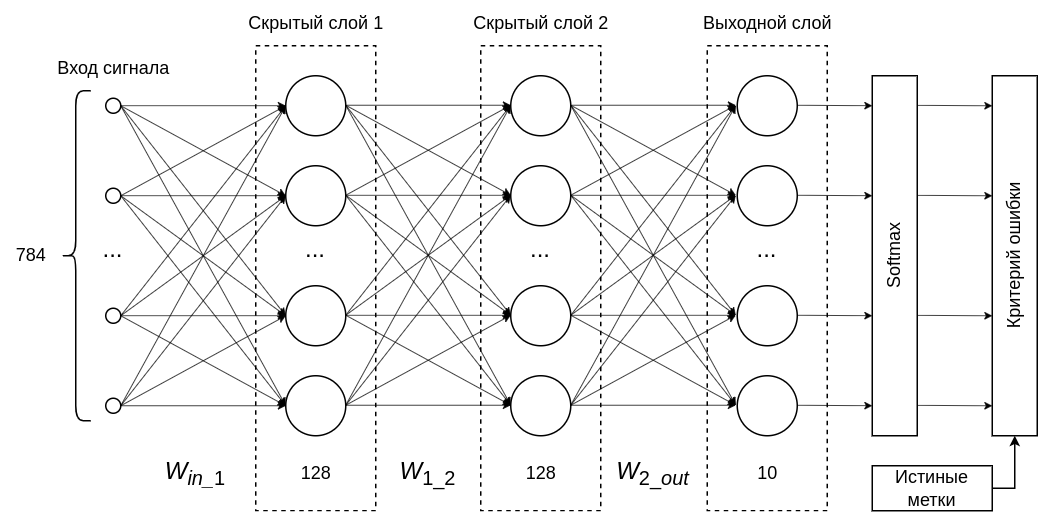

### Подготовка данных

In [40]:
# Трансформации данных
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Загрузка данных MNIST
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Закомментировать, если работать со всем датасетом 
train_dataset, _ = torch.utils.data.random_split(train_dataset, [10000, 50000])
test_dataset, _ = torch.utils.data.random_split(test_dataset, [2000, 8000])

print(f'Число экземпляров в датасетах: обучающие - {len(train_dataset)}, тестовые - {len(test_dataset)} ')
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

Число экземпляров в датасетах: обучающие - 10000, тестовые - 2000 


### Функция обучения модели

In [41]:
# Проверка доступности CUDA
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = 'cpu'
print(f'Используемое устройство: {device}')

Используемое устройство: cuda


In [42]:
# Функция для обучения модели
def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=10, device='cpu'):
    
    model.to(device)

    train_accuracies = []
    test_accuracies = []
    times = []

    for epoch in range(num_epochs):
        start_time = time.time()
        
        # Обучение
        model.train()
        correct_train = 0
        total_train = 0
        for images, labels in train_loader:
            
            images = images.to(device)
            labels = labels.to(device)
            
            images = images.view(-1, 28*28)  # Разворачиваем изображения
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_accuracy = 100 * correct_train / total_train
        train_accuracies.append(train_accuracy)
        
        elapsed_time = time.time() - start_time
        
        # Оценка на тестовых данных
        model.eval()
        correct_test = 0
        total_test = 0
        with torch.no_grad():
            for images, labels in test_loader:
                
                images = images.to(device)
                labels = labels.to(device)
                 
                images = images.view(-1, 28*28)
                outputs = model(images)
                
                _, predicted = torch.max(outputs.data, 1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()

        test_accuracy = 100 * correct_test / total_test
        test_accuracies.append(test_accuracy)
        
        times.append(elapsed_time)

        print(f'Epoch {epoch+1}/{num_epochs}, Time: {elapsed_time:.2f}s, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')

    return train_accuracies, test_accuracies, times


In [40]:
# Сравнение функций активации
activation_functions = {
    'ReLU': nn.ReLU(),
    'Sigmoid': nn.Sigmoid(),
    'Tanh': nn.Tanh()
}

# Результаты для каждой функции активации
test_accs_dict = {}
times_dict = {}
num_epochs = 50

# Инициализация критерия потерь (loss)
criterion = nn.CrossEntropyLoss()

# Цикл для обучения моделей с разными функциями активации
for name, activation_fn in activation_functions.items():
    print(f"\nТренировка модели с {name} активацией:")
    
    # Инициализация модели и оптимизатора
    model = SimpleMLP(activation_fn)
    optimizer = optim.Adam(model.parameters(), lr=0.005)
    
    # Обучение модели
    train_accuracies, test_accuracies, times = train_model(model, train_loader, test_loader, 
                                                           criterion, optimizer, 
                                                           num_epochs=num_epochs, device=device)
    
    # Сохранение результатов
    test_accs_dict[name] = test_accuracies
    times_dict[name] = times
    print(f'Максимальная точность модели с {name} на тестовых данных: {np.array(test_accuracies).max():.2f}%')
    print(f'Общее время обучения модели с {name}: {np.array(times).sum()}')
    



Тренировка модели с ReLU активацией:
Epoch 1/50, Time: 1.29s, Train Accuracy: 78.98%, Test Accuracy: 87.45%
Epoch 2/50, Time: 1.26s, Train Accuracy: 89.87%, Test Accuracy: 91.70%
Epoch 3/50, Time: 1.29s, Train Accuracy: 91.52%, Test Accuracy: 91.75%
Epoch 4/50, Time: 1.30s, Train Accuracy: 93.57%, Test Accuracy: 93.55%
Epoch 5/50, Time: 1.26s, Train Accuracy: 94.20%, Test Accuracy: 92.45%
Epoch 6/50, Time: 1.30s, Train Accuracy: 94.39%, Test Accuracy: 93.20%
Epoch 7/50, Time: 1.37s, Train Accuracy: 95.30%, Test Accuracy: 94.25%
Epoch 8/50, Time: 1.27s, Train Accuracy: 95.30%, Test Accuracy: 93.20%
Epoch 9/50, Time: 1.28s, Train Accuracy: 95.56%, Test Accuracy: 94.05%
Epoch 10/50, Time: 1.36s, Train Accuracy: 95.43%, Test Accuracy: 94.05%
Epoch 11/50, Time: 1.32s, Train Accuracy: 96.72%, Test Accuracy: 93.75%
Epoch 12/50, Time: 1.36s, Train Accuracy: 96.55%, Test Accuracy: 94.60%
Epoch 13/50, Time: 1.30s, Train Accuracy: 96.43%, Test Accuracy: 93.90%
Epoch 14/50, Time: 1.27s, Train Acc

### Построение графиков

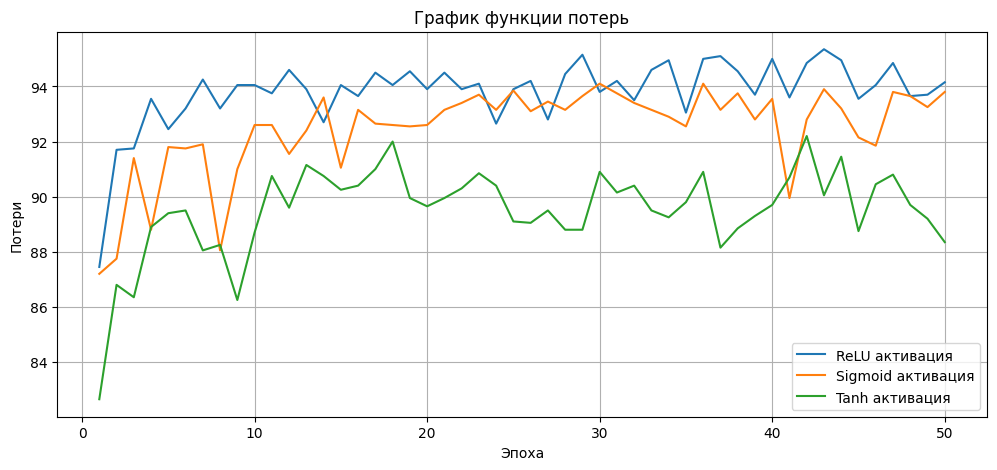

In [ ]:
# Построение графиков для сравнения
epochs = range(1, num_epochs+1)

# График функции потерь
plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)
for name, acc_list in test_accs_dict.items():
    plt.plot(epochs, acc_list, label=f'{name} активация')
plt.title('График функции потерь')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.grid(True)

plt.show()


- Функция активации может влиять на точность работы модели, выбор подходящей функции активации зависит от конкретной архитектуры модели.
- В большинстве случаев подходит ReLU


## 2.3. Способы инициализации весов


Инициализация весов влияет на скорость и стабильность обучения.

- **Случайная инициализация:** Веса инициализируются случайными значениями, обычно из нормального или равномерного распределения.
  
  $$
  W \sim \mathcal{N}(0, \sigma^2), \ W \sim \mathcal{U}(-0.1, 0.1)
  $$
  
- **Инициализация Xavier:**
  
  $$
  W \sim \mathcal{U}\left(-\sqrt{\frac{6}{n_{\text{in}} + n_{\text{out}}}}, \sqrt{\frac{6}{n_{\text{in}} + n_{\text{out}}}}\right)
  $$
  
- **Инициализация He:**
  
  $$
  b = gain \times \sqrt{3 / n} \\
  W \sim \mathcal{U}\left(-b, b\right)
  $$
  

---

In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import time
import matplotlib.pyplot as plt

import numpy as np

### Создание класса модели

In [ ]:
# Определение MLP модели
class SimpleMLP(nn.Module):
    def __init__(self, input_size=784, hidden_size=512, num_classes=10):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = torch.relu(out)
        out = self.fc2(out)
        return out


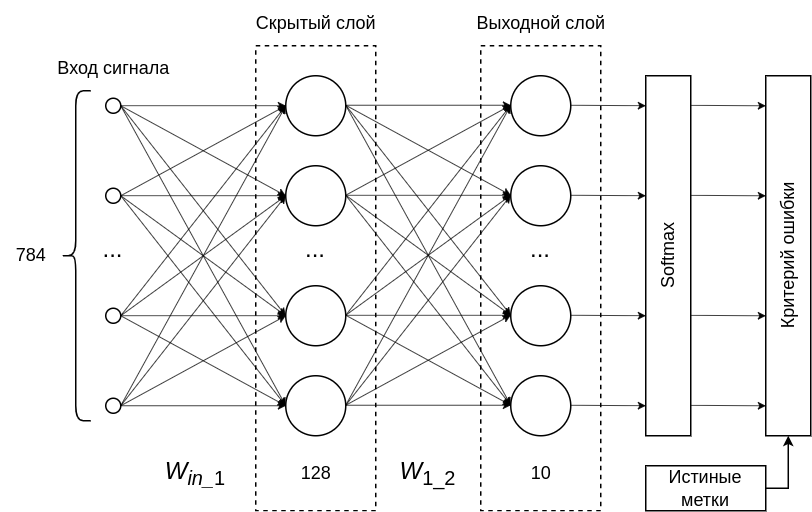

### Подготовка данных

In [56]:
# Трансформации данных
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Загрузка данных MNIST
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Закомментировать, если работать со всем датасетом 
train_dataset, _ = torch.utils.data.random_split(train_dataset, [10000, 50000])
test_dataset, _ = torch.utils.data.random_split(test_dataset, [2000, 8000])


print(f'Число экземпляров в датасетах: обучающие - {len(train_dataset)}, тестовые - {len(test_dataset)} ')
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

Число экземпляров в датасетах: обучающие - 10000, тестовые - 2000 


### Функции инициализации

In [57]:
# https://pytorch.org/docs/stable/nn.init.html
# Функция для инициализации весов
def init_weights(model, init_type="xavier"):
    if init_type == "xavier":
        nn.init.xavier_uniform_(model.fc1.weight)
        nn.init.xavier_uniform_(model.fc2.weight)
    elif init_type == "he":
        nn.init.kaiming_uniform_(model.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_uniform_(model.fc2.weight, nonlinearity='relu')        
    elif init_type == "random":
        nn.init.uniform_(model.fc1.weight, -0.1, 0.1)
        nn.init.uniform_(model.fc2.weight, -0.1, 0.1)        
        nn.init.uniform_(model.fc1.bias, -0.1, 0.1)
        nn.init.uniform_(model.fc2.bias, -0.1, 0.1)
    else:
        raise ValueError("Unknown init_type")

In [58]:
model = SimpleMLP()

In [59]:
# Linear layers are initialized with
# Engineering Manager, NVIDIA
# @ptrblck_de
"""
stdv = 1. / math.sqrt(self.weight.size(1))
self.weight.data.uniform_(-stdv, stdv)
if self.bias is not None:
    self.bias.data.uniform_(-stdv, stdv)
"""

'\nstdv = 1. / math.sqrt(self.weight.size(1))\nself.weight.data.uniform_(-stdv, stdv)\nif self.bias is not None:\n    self.bias.data.uniform_(-stdv, stdv)\n'

### Функция обучения и функция оценки 

In [60]:
# Проверка доступности CUDA
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = 'cpu'
print(f'Используемое устройство: {device}')

Используемое устройство: cuda


In [49]:
# Функция для обучения модели
def train_model(model, train_loader, criterion, optimizer, num_epochs=5, device='cpu'):
    
    model.to(device)
    
    loss_list = []
    for epoch in range(num_epochs):
        total_loss = 0
        for images, labels in train_loader:
            
            images = images.to(device)
            labels = labels.to(device)
            
            images = images.view(-1, 28*28)  # Преобразование изображений в векторы
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
        avg_loss = total_loss / len(train_loader)
        loss_list.append(avg_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')
    return loss_list

# Функция для оценки точности модели
def evaluate_model(model, test_loader, device='cpu'):
    
    model.to(device)
    model.eval()  # Перевод модели в режим оценки
    
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:

            images = images.to(device)
            labels = labels.to(device)

            images = images.view(-1, 28*28)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy


In [50]:
# Сравнение методов инициализации
initializations = ['xavier', 'he', 'random']
losses = {}
accuracies = {}

num_epochs = 10

# Инициализация критерия потерь
criterion = nn.CrossEntropyLoss()

# Цикл для обучения моделей с разной инициализацией
for init_type in initializations:
    print(f"\nТренировка модели с {init_type} инициализацией:")
    
    # Инициализация модели
    model = SimpleMLP()
    
    # Инициализация весов
    init_weights(model, init_type)
    
    # Оптимизатор
    optimizer = optim.Adam(model.parameters(), lr=0.005)
    
    # Обучение модели
    loss_list = train_model(model, train_loader, criterion, optimizer, num_epochs=10, device=device)
    
    # Оценка точности модели
    accuracy = evaluate_model(model, test_loader, device=device)
    
    # Сохранение результатов
    losses[init_type] = loss_list
    accuracies[init_type] = accuracy
    print(f'Точность модели с {init_type} инициализацией: {accuracy:.2f}%')




Тренировка модели с xavier инициализацией:
Epoch [1/10], Loss: 0.7711
Epoch [2/10], Loss: 0.3705
Epoch [3/10], Loss: 0.2984
Epoch [4/10], Loss: 0.2663
Epoch [5/10], Loss: 0.2124
Epoch [6/10], Loss: 0.1944
Epoch [7/10], Loss: 0.1811
Epoch [8/10], Loss: 0.1665
Epoch [9/10], Loss: 0.1387
Epoch [10/10], Loss: 0.1413
Точность модели с xavier инициализацией: 93.00%

Тренировка модели с he инициализацией:
Epoch [1/10], Loss: 0.6463
Epoch [2/10], Loss: 0.3432
Epoch [3/10], Loss: 0.2701
Epoch [4/10], Loss: 0.2519
Epoch [5/10], Loss: 0.2005
Epoch [6/10], Loss: 0.1803
Epoch [7/10], Loss: 0.1530
Epoch [8/10], Loss: 0.1353
Epoch [9/10], Loss: 0.1321
Epoch [10/10], Loss: 0.1046
Точность модели с he инициализацией: 90.75%

Тренировка модели с random инициализацией:
Epoch [1/10], Loss: 0.6325
Epoch [2/10], Loss: 0.3208
Epoch [3/10], Loss: 0.2570
Epoch [4/10], Loss: 0.2203
Epoch [5/10], Loss: 0.1873
Epoch [6/10], Loss: 0.1718
Epoch [7/10], Loss: 0.1448
Epoch [8/10], Loss: 0.1276
Epoch [9/10], Loss: 0.

### Построение графиков

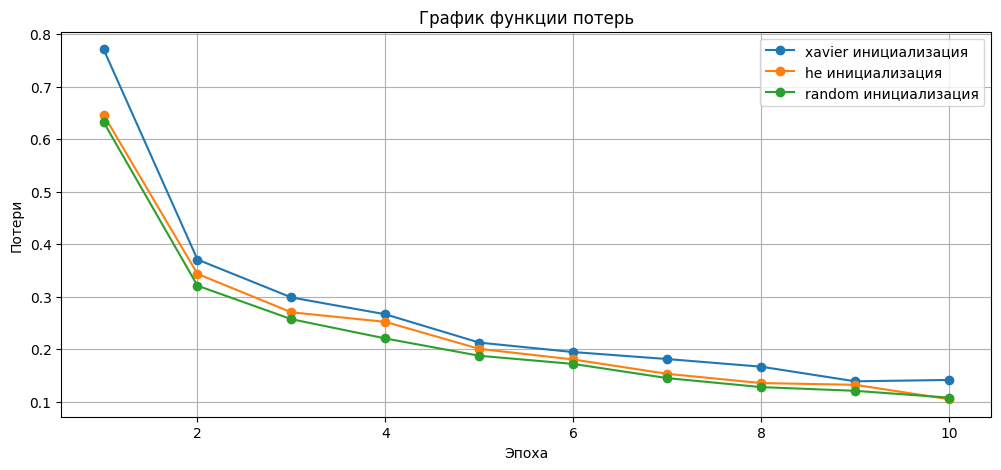

In [51]:
# Построение графиков для сравнения
epochs = range(1, num_epochs+1)

# График функции потерь
plt.figure(figsize=(12, 5))
for init_type, loss_list in losses.items():
    plt.plot(epochs, loss_list, marker='o', label=f'{init_type} инициализация')
plt.title('График функции потерь')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.grid(True)

plt.show()


## 3.1. Функции потерь. Loss-функции

Для сравнения нескольких функций потерь (loss functions) мы будем сравнивать следующие популярные функции потерь:

- __Cross-Entropy Loss__: стандартная функция потерь для многоклассовой классификации.
- __Mean Squared Error (MSE)__: часто используется для регрессии, но её также можно применить для классификации как альтернативу.

1. **CrossEntropyLoss**

Функция потерь **CrossEntropyLoss** объединяет **Softmax** и **Negative Log-Likelihood Loss (NLLLoss)** и часто используется для многоклассовой классификации. 

$$
L_{\text{CE}}(p, y) = -\sum_{i=1}^{C} p_i \log(q_i)
$$

- $ C $ — количество классов,
- $ p_i $ — истинная метка класса (обычно one-hot encoded, в случае одноразрядного распределения $ p $ будет иметь значение 1 для истинного класса и 0 для остальных),
- $ q_i $ — вероятность предсказания для класса $ i $, выход после softmax.


**Пример вычисления кросс-энтропии**

Рассмотрим ситуацию, когда модель предсказывает вероятности для 3 классов как $ q = [0.2, 0.1, 0.7] $. Чтобы вычислить кросс-энтропию, необходимо знать истинное распределение $ p $. Предположим, что истинный класс — один из трех, и рассмотрим все возможные случаи.

1. **Истинный класс — первый класс ($ p = [1, 0, 0] $):**

$$
H(p, q) = - (1 \cdot \log(0.2) + 0 \cdot \log(0.1) + 0 \cdot \log(0.7)) = -\log(0.2)
$$

$$
H(p, q) \approx -(-1.6094) = 1.6094
$$

2. **Истинный класс — второй класс ($ p = [0, 1, 0] $):**

$$
H(p, q) = - (0 \cdot \log(0.2) + 1 \cdot \log(0.1) + 0 \cdot \log(0.7)) = -\log(0.1)
$$

$$
H(p, q) \approx -(-2.3026) = 2.3026
$$

3. **Истинный класс — третий класс ($ p = [0, 0, 1] $):**

$$
H(p, q) = - (0 \cdot \log(0.2) + 0 \cdot \log(0.1) + 1 \cdot \log(0.7)) = -\log(0.7)
$$

$$
H(p, q) \approx -(-0.3567) = 0.3567
$$


In [7]:
# Пример расчёта в PyTorch

import torch
import torch.nn as nn

# Пример данных: логиты (до Softmax) и истинные метки классов
logits = torch.tensor([[2.0, 1.0, 0.1], [0.1, 2.1, 1.2]])  # 2 образца, 3 класса
labels = torch.tensor([0, 1])  # Истинные классы

# Инициализация функции CrossEntropyLoss (внутри использует Softmax)
criterion = nn.CrossEntropyLoss(reduction='mean')   # значение по умолчанию reduction='mean'
loss = criterion(logits, labels)

print('CrossEntropyLoss:', loss.item())


CrossEntropyLoss: 0.4250243306159973


- PyTorch автоматически применяет Softmax к `logits` перед расчётом NLLLoss.
- `labels` содержат истинные метки классов (индексы классов), что позволяет избежать использования one-hot encoding.



2. **MSELoss (Mean Squared Error Loss)**

Функция потерь **MSELoss** используется для регрессии и измеряет среднеквадратичное отклонение между предсказанными и истинными значениями:

$$
L_{\text{MSE}}(y_{\text{pred}}, y) = \frac{1}{N} \sum_{i=1}^{N} (y_{\text{pred}, i} - y_i)^2
$$

- $ y_{\text{pred}, i} $ — предсказанное значение для образца $ i $,
- $ y_i $ — истинное значение для образца $ i $,
- $ N $ — количество элементов в наборе данных.


In [8]:
# Пример расчёта в PyTorch:
import torch
import torch.nn as nn

# Пример данных: предсказанные и истинные значения
predictions = torch.tensor([0.9, 0.2, 0.8, 0.4])  # Предсказанные значения
labels = torch.tensor([1.0, 0.0, 1.0, 0.0])       # Истинные значения

# Инициализация функции MSELoss
criterion = nn.MSELoss()
loss = criterion(predictions, labels)
print('MSELoss:', loss.item())

MSELoss: 0.0625




**Объяснение:**
- `predictions` — это предсказанные значения модели для каждого элемента,
- `labels` — это истинные значения,
- `MSELoss` вычисляет среднеквадратичное отклонение между ними.

Сравнение

- **CrossEntropyLoss** лучше подходит для классификационных задач, так как учитывает вероятности предсказания классов.
- **MSELoss** чаще применяется в задачах регрессии, так как измеряет среднеквадратичную ошибку между непрерывными значениями.

Обе функции играют ключевую роль в обучении нейросетей и зависят от типа задачи — классификации или регрессии.

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

import numpy as np

### Создание класса модели

In [49]:
# Определение MLP модели
class SimpleMLP(nn.Module):
    def __init__(self, input_size=784, hidden_size=128, num_classes=10):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = torch.relu(out)
        out = self.fc2(out)
        return out
    

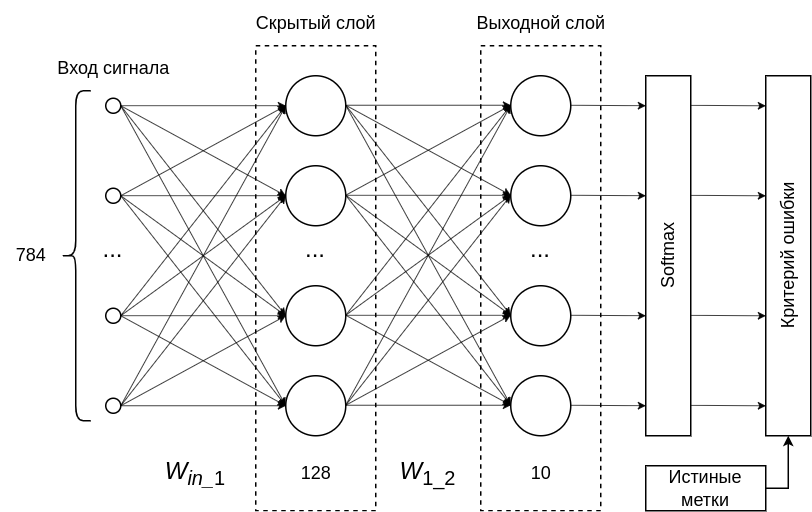

### Подготовка данных

In [10]:
# Трансформации данных
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Загрузка данных MNIST
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Закомментировать, если работать со всем датасетом 
train_dataset, _ = torch.utils.data.random_split(train_dataset, [10000, 50000])
test_dataset, _ = torch.utils.data.random_split(test_dataset, [2000, 8000])

print(f'Число экземпляров в датасетах: обучающие - {len(train_dataset)}, тестовые - {len(test_dataset)} ')
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

Число экземпляров в датасетах: обучающие - 10000, тестовые - 2000 


### Функция обучения и функция оценки

In [12]:
# Проверка доступности CUDA
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = 'cpu'
print(f'Используемое устройство: {device}')

Используемое устройство: cuda


In [13]:
# Функция для оценки точности модели
def evaluate_model(model, test_loader, device='cpu'):
    
    model.to(device)
    model.eval()  # Перевод модели в режим оценки
    
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:

            images = images.to(device)
            labels = labels.to(device)

            images = images.view(-1, 28*28)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

# Функция для обучения модели
def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=5, device='cpu'):
    
    model.to(device)
    
    loss_list = []
    test_accs = []
    for epoch in range(num_epochs):
        total_loss = 0
        for images, labels in train_loader:
            
            images = images.to(device)
            labels = labels.to(device)
            
            images = images.view(-1, 28*28)  # Преобразование изображений в векторы
            outputs = model(images)
            
            if criterion._get_name() == "MSELoss":
                labels_oh = nn.functional.one_hot(labels, num_classes=10)   # разворачивание меток класса в one_hot
                # Истинная метка класса - "3"
                # [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
                # [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
                # [0.1, 0.1, 0, 0.7, ...]
                loss = criterion(outputs, labels_oh.float())
                
            else:
                loss = criterion(outputs, labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
        avg_loss = total_loss / len(train_loader)
        loss_list.append(avg_loss)
        test_acc = evaluate_model(model, test_loader, device=device)
        test_accs.append(test_acc)
        
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Test Accuracy: {test_acc:.2f}%')
        
        
        
    return loss_list, test_accs



In [16]:
ims, lbls = next(iter(train_loader))

In [17]:
ims.shape, lbls.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

In [18]:
lbls_5 = lbls[:5]
print(lbls_5)

tensor([0, 7, 8, 7, 5])


In [56]:
labels_oh = nn.functional.one_hot(lbls_5, num_classes=10)
print(lbls_5)
print(labels_oh)

tensor([2, 5, 2, 0, 3])
tensor([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]])


### Обучение моделей

In [63]:
# Сравнение функций потерь
loss_functions = {
    'CrossEntropyLoss': nn.CrossEntropyLoss(),
    'MSELoss': nn.MSELoss()
}

losses = {}
accuracies = {}
test_accuracies_dict = {}
num_epochs = 50

# Инициализация модели и оптимизатора
for loss_name, criterion in loss_functions.items():
    print(f"\nТренировка модели с функцией потерь {loss_name}:")
    
    # Инициализация модели
    model = SimpleMLP()

    # Оптимизатор
    optimizer = optim.Adam(model.parameters(), lr=0.002)    # lr = 0.005
    
    # Обучение модели
    loss_list, test_accuracies = train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=num_epochs, device=device)
    
    # Оценка точности модели
    accuracy = evaluate_model(model, test_loader, device=device)
    
    # Сохранение результатов
    losses[loss_name] = loss_list
    test_accuracies_dict[loss_name] = test_accuracies
    accuracies[loss_name] = accuracy
    print(f'Точность модели с {loss_name}: {accuracy:.2f}%')



Тренировка модели с функцией потерь CrossEntropyLoss:
Epoch [1/50], Loss: 0.6310, Test Accuracy: 87.55%
Epoch [2/50], Loss: 0.3648, Test Accuracy: 90.10%
Epoch [3/50], Loss: 0.2831, Test Accuracy: 92.05%
Epoch [4/50], Loss: 0.2318, Test Accuracy: 92.90%
Epoch [5/50], Loss: 0.1998, Test Accuracy: 92.60%
Epoch [6/50], Loss: 0.1697, Test Accuracy: 92.00%
Epoch [7/50], Loss: 0.1449, Test Accuracy: 94.15%
Epoch [8/50], Loss: 0.1211, Test Accuracy: 94.50%
Epoch [9/50], Loss: 0.1059, Test Accuracy: 94.65%
Epoch [10/50], Loss: 0.0840, Test Accuracy: 94.60%
Epoch [11/50], Loss: 0.0802, Test Accuracy: 95.20%
Epoch [12/50], Loss: 0.0775, Test Accuracy: 94.10%
Epoch [13/50], Loss: 0.0615, Test Accuracy: 95.25%
Epoch [14/50], Loss: 0.0504, Test Accuracy: 94.35%
Epoch [15/50], Loss: 0.0382, Test Accuracy: 95.35%
Epoch [16/50], Loss: 0.0326, Test Accuracy: 95.65%
Epoch [17/50], Loss: 0.0417, Test Accuracy: 95.60%
Epoch [18/50], Loss: 0.0305, Test Accuracy: 95.80%
Epoch [19/50], Loss: 0.0424, Test Ac

### Построение графиков 

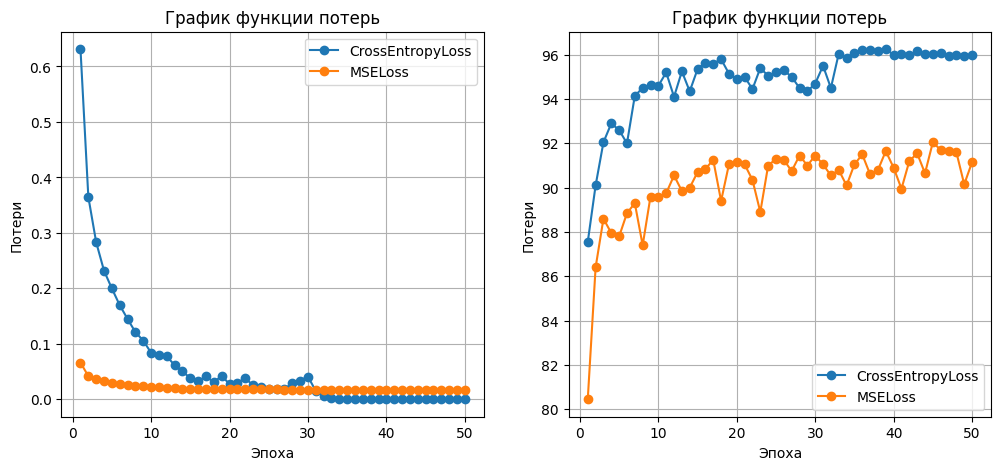

In [64]:
# Построение графиков для сравнения
epochs = range(1, num_epochs+1)

# График функции потерь
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for loss_name, loss_list in losses.items():
    plt.plot(epochs, loss_list, marker='o', label=f'{loss_name}')
plt.title('График функции потерь')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.grid(True)

# График точности
plt.subplot(1, 2, 2)
for loss_name, acc_list in test_accuracies_dict.items():
    plt.plot(epochs, acc_list, marker='o', label=f'{loss_name}')
plt.title('График точности на тестовых данных')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.grid(True)

plt.show()



- Сравнение функций потерь даст представление о том, как они влияют на сходимость и точность модели. Например, `CrossEntropyLoss` обычно показывает лучшие результаты для задач классификации, тогда как `MSELoss` может не быть оптимальной для таких задач.

## 3.2. Сравнение методов оптимизации (optimizers)

![Screenshot from 2024-10-07 23-43-52.png](<attachment:Screenshot from 2024-10-07 23-43-52.png>)
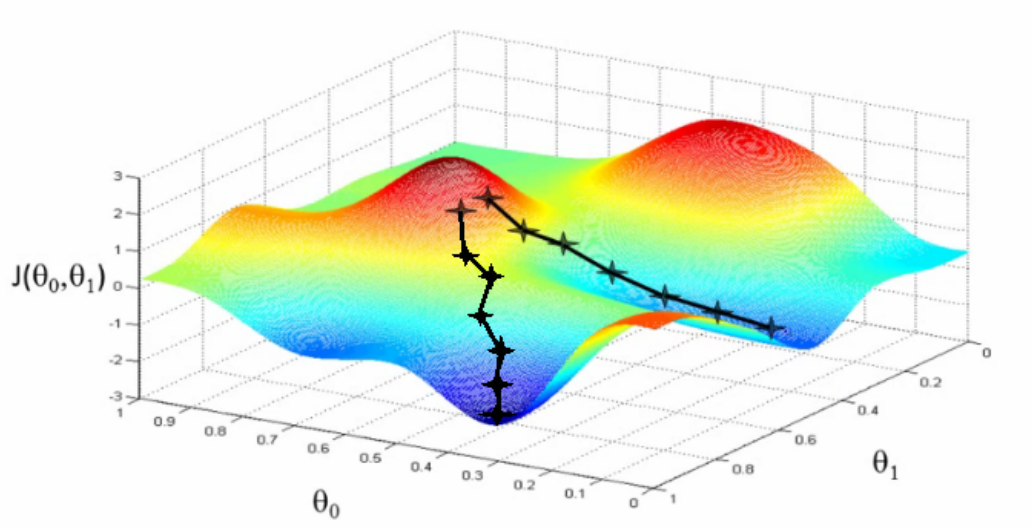

Для сравнения различных оптимизаторов, таких как **SGD**, **Adam**, **RMSprop** можно провести эксперименты с одинаковой архитектурой модели и гиперпараметрами, изменяя только оптимизаторы. Далее мы будем сравнивать скорость сходимости и точность моделей.

### Импорт библиотек

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import time

### Теория градиентный спуск

In [21]:
model = nn.Sequential(nn.Linear(784, 128))

In [23]:
for p in model.named_parameters():
    print (p[0], p[1].shape)

0.weight torch.Size([128, 784])
0.bias torch.Size([128])


#### Градиентный спуск


**Идея:**
- Делает шаги в направлении отрицательного градиента к точке условного минимума в данном направлении.

$$
w(\tau + 1) = w(\tau) - \alpha \nabla E(w(\tau))
$$

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0)

#### Градиентный спуск с импульсом (моментумом)



**Идея:**
- Делает шаги в направлении, которое является линейной комбинацией отрицательного градиента и предыдущего направления.

**Уравнения (Румельхарт, 1986):**

$$
w(\tau + 1) = w(\tau) - \alpha \nabla E(w(\tau)) + \mu \Delta w(\tau)
$$

$$
\Delta w(\tau) = w(\tau) - w(\tau - 1)
$$

Начальная точка: $ w(0) = w_0 $, $ \alpha > 0 $ — скорость обучения, $ \mu > 0 $ — импульс.

- Импульс можно рассматривать как "инерцию" спуска.
- Ускорение на плоских участках и замедление на крутых, благодаря адаптивной скорости обучения.
- Трудности с выбором $ \alpha $ и $ \mu $.

![Screenshot from 2024-10-08 00-00-51.png](<attachment:Screenshot from 2024-10-08 00-00-51.png>)
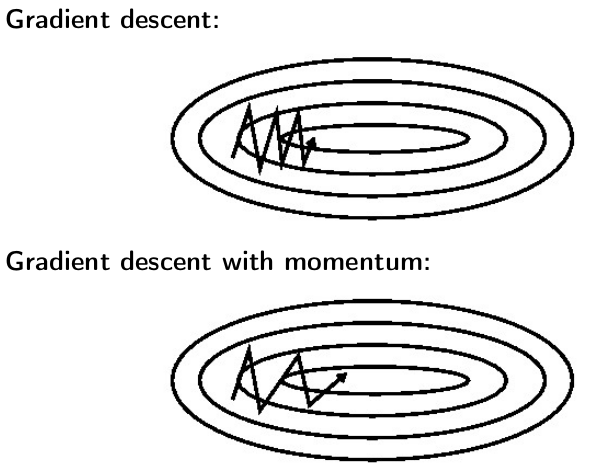

In [68]:
optimizer = optim.SGD(model.parameters(), momentum=0.05, lr=0.001)

#### *Изменение скорости обучения

Изменение скорости обучения (learning rate) — это важный аспект настройки градиентного спуска, который влияет на скорость сходимости и качество финального решения. Если скорость обучения слишком большая, оптимизация может быть нестабильной, и модель может не сойтись. Если слишком маленькая — обучение может стать слишком медленным. Существует несколько распространённых методов изменения скорости обучения во время тренировки модели:

1. **Постоянная скорость обучения**
- **Описание**: Скорость обучения остается неизменной на протяжении всего обучения. Используется в самых простых реализациях градиентного спуска.
- **Недостатки**: Оптимизация может застопориться на плоских участках или больших плато функции потерь, либо на слишком больших скоростях обучения модель может "проскочить" мимо минимума.

2. **Постепенное уменьшение скорости обучения (Decay/Learning Rate Annealing)**
- **Описание**: Скорость обучения уменьшается по мере продвижения обучения, чтобы обеспечить более стабильную оптимизацию ближе к минимуму функции потерь.
- **Основная формула**:
  $$
  \alpha_t = \frac{\alpha_0}{1 + \lambda t}
  $$
  где $ \alpha_0 $ — начальная скорость обучения, $ \lambda $ — коэффициент, контролирующий скорость уменьшения, $ t $ — номер эпохи или итерации.
- **Применение**: Полезно для предотвращения "перескакивания" через минимум и для лучшей сходимости в конце обучения.

3. **Exponential Decay**
- **Описание**: Скорость обучения уменьшается по экспоненциальному закону.
- **Формула**:
  $$
  \alpha_t = \alpha_0 e^{-\lambda t}
  $$
  где $ \lambda $ — коэффициент экспоненциального уменьшения.
- **Плюсы**: Экспоненциальное уменьшение позволяет довольно быстро снижать скорость обучения в начале обучения, оставляя её достаточно маленькой к концу, чтобы стабилизировать процесс.

4. **Step Decay (по шагам)**
- **Описание**: Скорость обучения уменьшается через определённые интервалы (например, каждые $ N $ эпох) на фиксированный коэффициент.
- **Пример**:
  $$
  \alpha_t = \alpha_0 \times \gamma^{\left(\frac{t}{N}\right)}
  $$
  где $ \gamma $ — фиксированный коэффициент (например, $ \gamma = 0.1 $) и $ N $ — количество эпох до уменьшения скорости.
- **Применение**: Обычно используется для ситуаций, когда нужно уменьшать скорость скачкообразно по мере достижения стабильности.

5. **Learning Rate Scheduling (планировщики скорости обучения)**
  - В современных фреймворках (например, PyTorch, TensorFlow) можно использовать встроенные планировщики изменения скорости обучения. Они позволяют гибко управлять динамикой изменения скорости обучения, основываясь на метриках, прогрессе обучения или номере эпохи.

  - **Пример планировщиков в PyTorch**:
    - `StepLR`: уменьшает скорость через равные промежутки.
    - `ReduceLROnPlateau`: уменьшает скорость, когда метрика (например, функция потерь) перестает улучшаться.
    - `ExponentialLR`: реализует экспоненциальное уменьшение.

In [69]:
# Использование StepLR для уменьшения скорости через каждые 10 эпох
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

#### RMSProp (Root Mean Square Propagation)

Идея:
Модифицированный градиентный спуск, использующий экспоненциально усреднённый квадрат градиента для адаптации скорости обучения.

__Уравнения (Hinton, 2012):__
$$
w_j(\tau + 1) = w_j(\tau) - \alpha_j(\tau) \frac{\partial E(w(\tau))}{\partial w_j}
$$

$$
\alpha_j(\tau) = \frac{\alpha}{\sqrt{G_j(\tau) + \epsilon}}, \quad j = 1, \dots, m
$$

$$
G_j(\tau) = \rho G_j(\tau - 1) + (1 - \rho) \left(\frac{\partial E(w(\tau))}{\partial w_j}\right)^2, \quad \tau = 1, 2, \dots
$$

__Начальная точка:__
$$
w(0) = w_0, \quad \alpha > 0 \quad \text{— базовая скорость обучения}
$$

$\rho$ — коэффициент забывания, $0 < \rho < 1$, $G(0) = (\nabla E(w(0)))^2$

$\epsilon$ — сглаживающий член, предотвращающий деление на ноль (обычно $\epsilon \approx 10^{-8}$).


In [24]:
optimizer = optim.RMSprop(model.parameters(), lr=0.001, alpha=0.99)     # alpha это "ро"

#### Adam (Adaptive Moment Estimator)

__Идея__:

Модифицированный градиентный спуск с индивидуальной скоростью обучения для каждого параметра, использующий оценки первого и второго моментов градиента.

__Уравнения (Kingma (OpenAI), 2015):__

$$
w_j(\tau + 1) = w_j(\tau) - \alpha_j(\tau) \hat{g}_j(\tau)
$$

$$
\alpha_j(\tau) = \frac{\alpha}{\sqrt{\hat{G}_j(\tau) + \epsilon}}, \quad j = 1, \dots, m
$$

$$
\hat{g}(\tau) = \frac{g(\tau)}{1 - \beta_1^{\tau+1}}
$$

$$
\hat{G}(\tau) = \frac{G(\tau)}{1 - \beta_2^{\tau+1}}, \quad \tau = 0, 1, \dots
$$

$$
g_j(\tau) = \beta_1 g_j(\tau - 1) + (1 - \beta_1) \frac{\partial E(w(\tau))}{\partial w_j}, \quad \tau = 0, 1, \dots
$$

$$
G_j(\tau) = \beta_2 G_j(\tau - 1) + (1 - \beta_2) \left(\frac{\partial E(w(\tau))}{\partial w_j}\right)^2, \quad \tau = 0, 1, \dots
$$

Начальная точка: $ w(0) = w_0 $, $ \beta_1 $, $ \beta_2 $ — коэффициенты забывания, $ 0 < \beta_1 < 1 $, $ 0 < \beta_2 < 1 $, $ \epsilon $ — сглаживающий член.

$ g_j(\tau) $ — экспоненциально взвешенная частная производная по отношению к $ w_j $, до итерации $ \tau $, $ g_j(-1) = 0 $, $ j = 1, ..., m $ (первый момент).

$ G_j(\tau) $ — экспоненциально взвешенный квадрат частной производной по отношению к $ w_j $, до итерации $ \tau $, $ G_j(-1) = 0 $, $ j = 1, ..., m $ (второй момент).

$ \hat{g}(\tau) $, $ \hat{G}(\tau) $ — скорректированные первый и второй моменты градиента на итерации $ \tau $.


__Заметки:__
- Эффективен для функций с очень шумными и/или разреженными градиентами.
- Достаточно прост в настройке, так как значения параметров по умолчанию работают хорошо для большинства задач:
  $ \alpha = 0.001, \beta_1 = 0.9, \beta_2 = 0.999, \epsilon = 10^{-8} $.
- **Adam** похож на **RMSProp** с добавлением момента (Momentum).

![Screenshot from 2024-10-08 00-28-25.png](<attachment:Screenshot from 2024-10-08 00-28-25.png>)
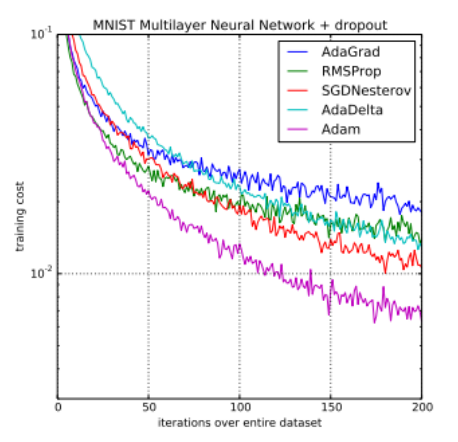

In [71]:
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999))

### Создание класса модели

In [ ]:
# Определение MLP модели
class SimpleMLP(nn.Module):
    def __init__(self, input_size=784, hidden_size=512, num_classes=10):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = torch.relu(out)
        out = self.fc2(out)
        return out
    

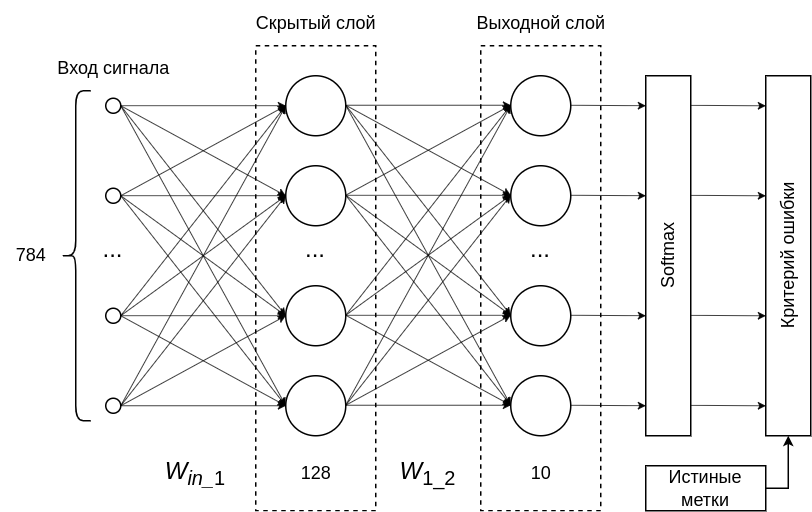

### Подготовка данных

In [10]:
# Трансформации данных
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Загрузка данных MNIST
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Закомментировать, если работать со всем датасетом 
train_dataset, _ = torch.utils.data.random_split(train_dataset, [10000, 50000])
test_dataset, _ = torch.utils.data.random_split(test_dataset, [2000, 8000])

print(f'Число экземпляров в датасетах: обучающие - {len(train_dataset)}, тестовые - {len(test_dataset)} ')
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

Число экземпляров в датасетах: обучающие - 10000, тестовые - 2000 


### Функция обучения и функция оценки

In [11]:
# Проверка доступности CUDA
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = 'cpu'
print(f'Используемое устройство: {device}')

Используемое устройство: cuda


In [75]:
# Функция для обучения модели
def train_model(model, train_loader, criterion, optimizer, num_epochs=5, device='cpu'):
    
    model.to(device)
    
    loss_list = []
    for epoch in range(num_epochs):
        total_loss = 0
        for images, labels in train_loader:
            
            images = images.to(device)
            labels = labels.to(device)
            
            images = images.view(-1, 28*28)  # Преобразование изображений в векторы
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
        avg_loss = total_loss / len(train_loader)
        loss_list.append(avg_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')
    return loss_list

# Функция для оценки точности модели
def evaluate_model(model, test_loader, device='cpu'):
    
    model.to(device)
    model.eval()  # Перевод модели в режим оценки
    
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:

            images = images.to(device)
            labels = labels.to(device)

            images = images.view(-1, 28*28)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy


### Обучение моделей

In [25]:
def init_weights(model):
    nn.init.uniform_(model.fc1.weight, -0.1, 0.1)
    nn.init.uniform_(model.fc2.weight, -0.1, 0.1)
    nn.init.uniform_(model.fc1.bias, -0.1, 0.1)
    nn.init.uniform_(model.fc2.bias, -0.1, 0.1)

In [ ]:
model = SimpleMLP().to(device)
criterion = nn.CrossEntropyLoss()

# Оптимизаторы для сравнения
optimizers = {
    "SGD": optim.SGD(model.parameters(), lr=0.001),
    "Adam": optim.Adam(model.parameters(), lr=0.001),
    "Adam2": optim.Adam(model.parameters(), lr=0.001, betas=(0.8, 0.7)),
    "RMSprop": optim.RMSprop(model.parameters(), lr=0.001),
}

# Сравнение разных оптимизаторов
num_epochs = 50
loss_histories = {}
accuracies = {}
times = {}

for opt_name, optimizer in optimizers.items():
    print(f"\nTraining with {opt_name} optimizer:")
    
    init_weights(model)    
    # Тренировка модели
    start_train = time.time()
    loss_history = train_model(model, train_loader, criterion, optimizer, num_epochs=num_epochs, device=device)
    end_train = time.time() - start_train
    times[opt_name] = end_train
    
    # Оценка точности на тестовом наборе
    accuracy = evaluate_model(model, test_loader, device=device)
    
    # Сохранение результатов
    loss_histories[opt_name] = loss_history
    accuracies[opt_name] = accuracy



Training with SGD optimizer:
Epoch [1/50], Loss: 2.2243
Epoch [2/50], Loss: 1.9450
Epoch [3/50], Loss: 1.7348
Epoch [4/50], Loss: 1.5521
Epoch [5/50], Loss: 1.3954
Epoch [6/50], Loss: 1.2625
Epoch [7/50], Loss: 1.1514
Epoch [8/50], Loss: 1.0600
Epoch [9/50], Loss: 0.9821
Epoch [10/50], Loss: 0.9177
Epoch [11/50], Loss: 0.8625
Epoch [12/50], Loss: 0.8181
Epoch [13/50], Loss: 0.7780
Epoch [14/50], Loss: 0.7431
Epoch [15/50], Loss: 0.7123
Epoch [16/50], Loss: 0.6869
Epoch [17/50], Loss: 0.6637
Epoch [18/50], Loss: 0.6441
Epoch [19/50], Loss: 0.6237
Epoch [20/50], Loss: 0.6105
Epoch [21/50], Loss: 0.5932
Epoch [22/50], Loss: 0.5795
Epoch [23/50], Loss: 0.5671
Epoch [24/50], Loss: 0.5543
Epoch [25/50], Loss: 0.5444
Epoch [26/50], Loss: 0.5342
Epoch [27/50], Loss: 0.5258
Epoch [28/50], Loss: 0.5172
Epoch [29/50], Loss: 0.5098
Epoch [30/50], Loss: 0.5022
Epoch [31/50], Loss: 0.4942
Epoch [32/50], Loss: 0.4873
Epoch [33/50], Loss: 0.4813
Epoch [34/50], Loss: 0.4757
Epoch [35/50], Loss: 0.4701

### Построение графиков

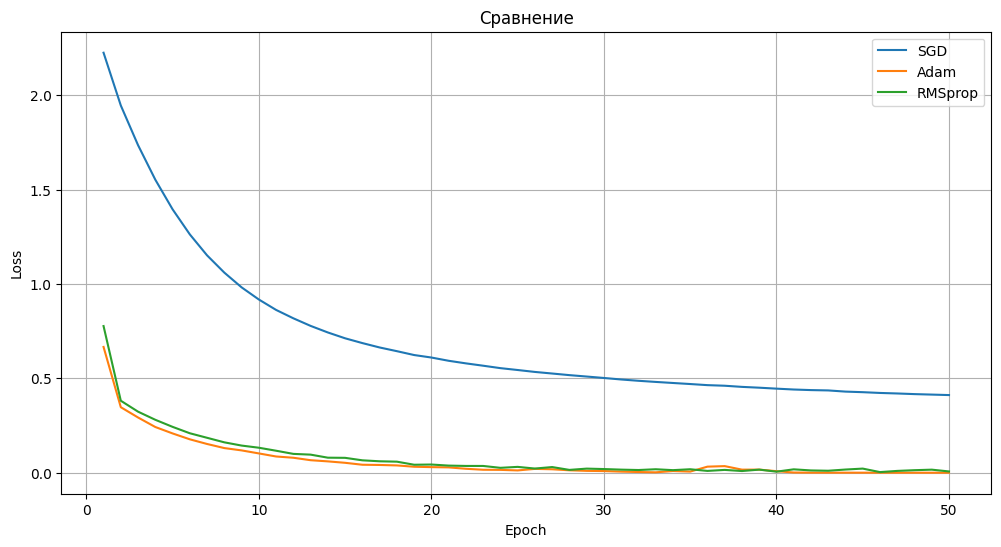

In [78]:
# Построение графиков потерь (Loss) для каждого оптимизатора
plt.figure(figsize=(12, 6))

for opt_name, loss_history in loss_histories.items():
    plt.plot(range(1, num_epochs + 1), loss_history, label=opt_name)

plt.title("Сравнение")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


In [79]:
accuracies, times

({'SGD': 88.1, 'Adam': 96.1, 'RMSprop': 95.9},
 {'SGD': 62.88150358200073,
  'Adam': 64.19153642654419,
  'RMSprop': 63.436166763305664})

- **SGD** обычно имеет более медленную сходимость по сравнению с **Adam**, но иногда может давать лучшие результаты при большем количестве эпох.
- **Adam** часто имеет более быструю сходимость, но чувствителен к выбору скорости обучения.
- **RMSprop** часто ведет себя похоже на Adam, так как они оба динамически корректируют скорость обучения для каждого параметра.

Необходимо учитывать архитектуры и наборы данных для более глубокого анализа поведения оптимизаторов в зависимости от задачи.